Read about automatic differentation in "Machine Learning Defined" appendix B. You can find that online here
https://jermwatt.github.io/machine_learning_refined/notes/3_First_order_methods/3_5_Automatic.html
To make the module autograd available we use the following commands:

In [5]:
# import statement for autograd wrapped numpy
import autograd.numpy as np   
# import statment for gradient calculator
from autograd import grad  
import matplotlib.pyplot as plt

Then we can use the following generic code for doing the gradient descent:

In [9]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return cost_history,weight_history

We now want to find the minimum of 
$$g(w)=\frac{1}{50}(w^4+w^2+10w)$$ using the above gradient descent. Make three separate runs using a step length of $\alpha$=1,0.1 and 0.01 starting from $w^0=2$ with 1,000 iterations. Plot the resulting cost histories. Which step length works best for this particular function and initial point ?

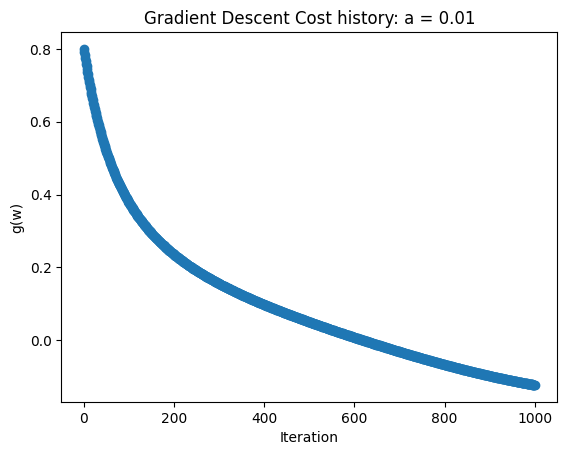

In [14]:
g = lambda w: (w**4 + w**2 + 10*w) / 50; alpha = 0.01; w = np.array([2]); max_its = 1000;

cost_history, weight_history = gradient_descent(g, alpha, max_its, w)

def plot_cost_history(cost_history):
    plt.figure()
    plt.plot(cost_history, marker="o")
    plt.xlabel("Iteration")
    plt.ylabel("g(w)")
    plt.title(f"Gradient Descent Cost history: a = {alpha}")
    plt.show()
plot_cost_history(cost_history)